# Report 3 MTH 448
## By: Kartik Garg 
## Person Number:50200426 
### Date: 04-25-2018
# Classification of Handwritten characters using Machine Learning.

## I. Introduction

We have 11 handwritten characters(i.e. period/dot,0,1,2,4,7,8,9,m,o,r) in .png image format written in various handwritten fonts in a folder named png. (1.)

Here we use a combination of machine learning from scratch(i.e. we are not using any inbuilt machine learning package) and some inbuilt python packages (such as pandas, numpy etc.) to extract images, its features and using Support Vector Machines(SVM) to get a 6 dimensional Hyperplane(W) which separtes images. Then we use implement cross-validation to get a hyperplane(W) using training and testing data. Then using the Hyperplane we try to classify these images.


## II. Extracting images, its features and visualizing
####  First we extract the images and some of their features (such as their 'ink','width','height','topheaviness','rightheaviness','log aspect') and try to visualize them.

In [1]:
from PIL import Image #This module provides a number of factory functions, including functions to load images from files, and to create new images.
import glob #The glob module finds all the pathnames matching a specified pattern
from numpy import * #numpy package
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load image names from a folder and extract the image labels from these filenames

In [2]:
def load_images_extract_labels(images_foldername,characters_to_load): # fuction to load images and extract labels
    pngs = [] # contains all png filenames (1.)
    for c in characters_to_load:# to compute filenames of characters we want.
        pngs += glob.glob('pngs/*_'+c+'.png') #load filenames of characters we want
    
    labels = []# contains labels of all characters (09,_1,_2 and so on)
    for i,png in enumerate(pngs):
        labels.append(png[-6:-4])  #computing labels of characters we want
        
    return pngs,labels #returns pngs and labels

### Using labels to create a y vector containing +1's and -1's which can represent two different images

In [3]:
images_foldername = 'pngs' #folder name
characters_to_load = ['09','_8']# classification of '.' and 8's
pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #function call to get labels and filenames of '.' and '8'
#print(labels)
#print([label=='09' for label in labels])
y_true = array([1*(label=='09') for label in labels]) + array([-1*(label=='_8') for label in labels]) # contains +1 for '.' and -1 for '8'
print(y_true)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

### Extracting the 6 features for the images.

In [4]:
def extract_6features(png): # function to extract features

    n = len(pngs) # n has length of png array
    features = ['ink','width','height','topheaviness','rightheaviness','log aspect'] # the features we are extracting
    d = len(features) # d has length of feature array
    F = empty((n,d))  # array of feature vectors


    for i,png in enumerate(pngs): # loop though all png
        img = Image.open(png)#open the png image
        a = array(img)# a contains array of images
        #print( a.shape )
        a = a[:,:,0]   #  select the red layer (because red, green, blue all the same)
        h,w = a.shape # h and w stores the shape of a
        x = linspace(0,w,w,endpoint=False) # iterates from 0 to w
        y = linspace(0,h,h,endpoint=False) # iterates from 0 to h
        X,Y = meshgrid(x,y) # creates a meshgrid data
        a = array(255-a,dtype=float)
        ink = a.sum()
        F[i,0] = ink/(255*w*h/5)   # can we normalize this sensibly?
        xmin = X[ a>0 ].min()  # the minimum x value where a>0
        xmax = X[ a>0 ].max()# the max x value where a>0
        ymin = Y[ a>0 ].min()  # the minimum y value where a>0
        ymax = Y[ a>0 ].max()# the max y value where a>0
        width  = xmax - xmin #total width of image
        height = ymax - ymin #total height of image
        F[i,1] = width/w   # can we normalize this sensibly?
        F[i,2] = height/h   # can we normalize this sensibly?
        xc = (xmin+xmax)/2   # center of character on x axis
        yc = (ymin+ymax)/2 # center of character on y axis
        # could alteranatively use center of mass
        # xc = (a*X).sum()/ink
        # yc = (a*Y).sum()/ink
        F[i,3] = a[ Y>yc ].sum()/ink # total ink above center

        F[i,4] = a[ X>xc ].sum()/ink  # total ink to the right of center
        
        F[i,5] = log10(height/width) # log of aspect ratio

    return features,F # returns feature array and 6-D F array.

### Display the shape of features

In [5]:
features,F = extract_6features(pngs) #feature array and 6-D F array.
shape(F) # print shape of array F

(449, 6)

### Create a function to visualize the 2D projects of these features

In [6]:
def visualize_2D_projections(F,features,pngs,label_vector):
    colors = 'cmbgrkyw' # different colors
    distinct_labels = list(set(label_vector)) #contains a list of different labels
    label_dict = {distinct_labels[i]:i for i in range(2)}
    print(label_dict)
    d = shape(F)[1] # number_features
    figure(figsize=(15,15)) # size of the figure
    for i in range(d):
        for j in range(d):
            subplot(d,d,i*d+j+1) # plot the i,j coordinate plane projections
            if i==j: 
                text(.5,.5,features[i],ha='center')
            else:
                scatter(F[:,j],F[:,i], s=2, c=label_vector, marker=(5, 0)) # scatter plot
            xticks([])
            yticks([])            
    return

### Run the "visualize_2D_projections" to extract and visualize in the form of 6d data.

{1: 0, -1: 1}


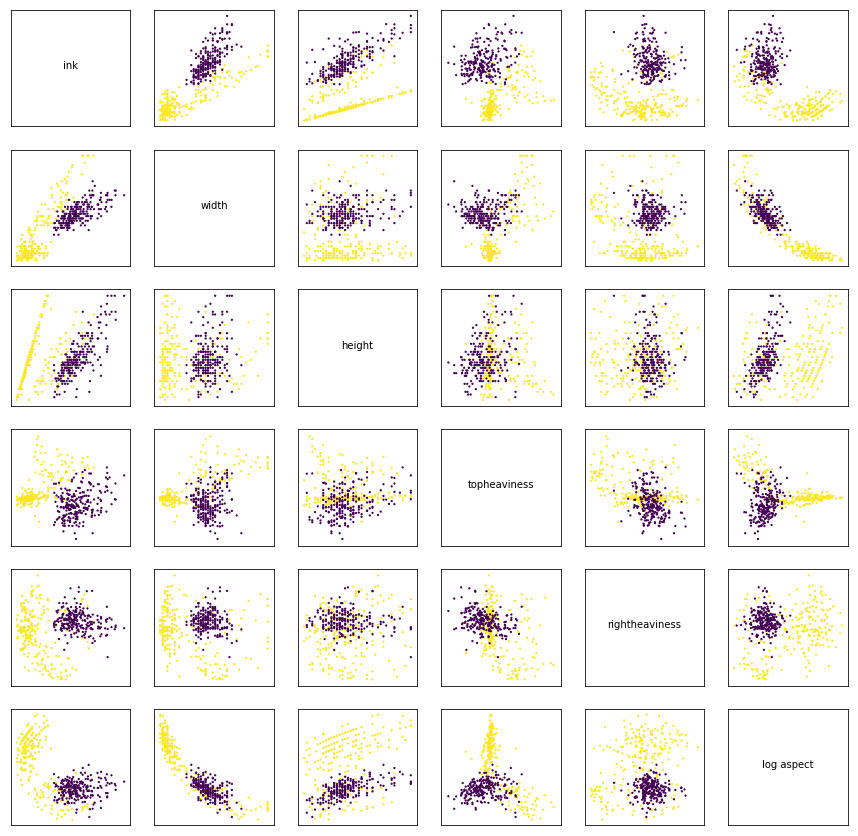

In [7]:
images_foldername = 'pngs' # folder name
characters_to_load = ['_1','_8'] # classification of '1' and 8's

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)#function call to get labels and filenames of '1' and '8'
features,F = extract_6features(pngs) # extract feature and F for '1' and '8'
y_true = array([1*(label=='_1') for label in labels]) + array([-1*(label=='_8') for label in labels]) #y_true for '1' and '8'.

visualize_2D_projections(F,features,pngs,y_true) #visualizing these

### Classifying the images using a SVM. 
This is to find a hyperplane in the 6-dimensional space that splits the datapoints for the 2 label types

In [8]:
from cvxopt import matrix,solvers #cvopt package to compute solver
def apply_SVM(F,y): #SVM function
    
    n,d=shape(F) #n and d has the shape of F for different images
    X = empty((d+1,n)) # empty list with 7 dimenions
    X[0,:] = 1 # initializing 1 
    X[1:,:] = F.T # for all others F.T
    
    #Preparing the parameters for cvxopt solver
    P = eye(d+1) 
    P[0,0] = 0
    q = zeros(d+1)
    G = (-X*y).T
    h = -ones(n)
    P = matrix(P)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    
    #Solve the problem
    solvers.options['show_progress'] = False
    sol=solvers.qp(P,q,G,h)
    
    # The separating hyperplane 'W'
    W = array(sol['x']).reshape(d+1)

    return W,X # returns hyperplane and array X

### Running all the functions in a block to visualize the progress.

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1

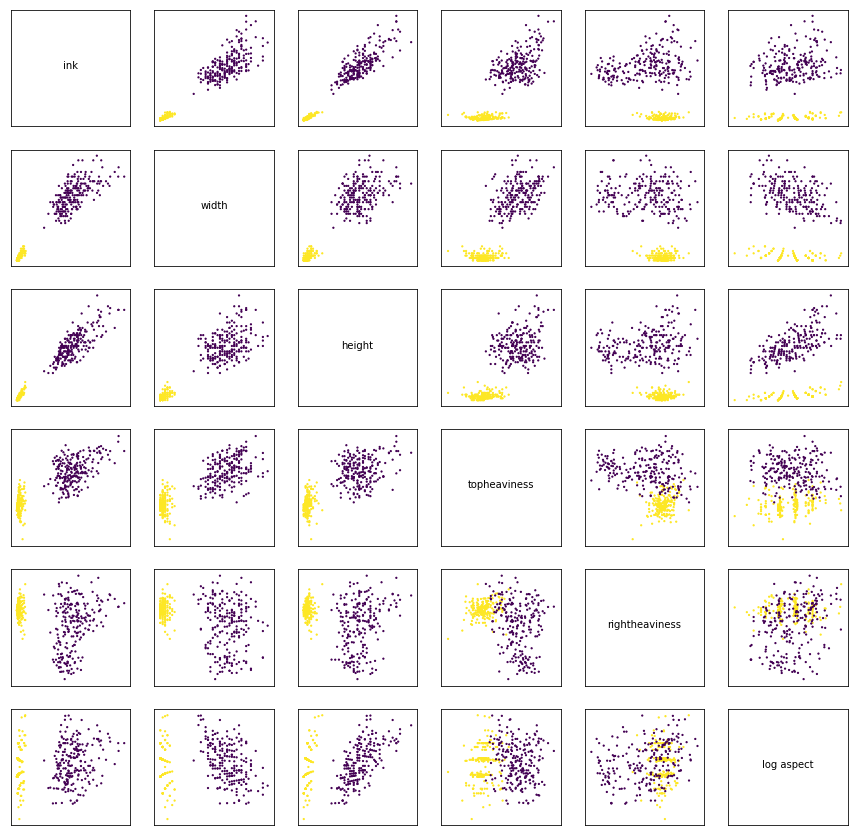

In [9]:
images_foldername = 'pngs' # folder name
characters_to_load = ['09','_2'] # classification of '.' and '2's

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #function call to get labels and filenames of '.' and '2'
features,F = extract_6features(pngs) # extract F and features for '.' and '2'

y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])
print(y_true) ##y_true +1 for 1'st char and -1 for 2nd char in "characters_to_load " .

visualize_2D_projections(F,features,pngs,y_true) #visualizing these

W,X = apply_SVM(F,y_true)
y = sign(dot(W,X))
Error = 1- sum(y==y_true)/shape(F)[0]
print(Error) #error for '.' and '2' 

## III. Creating a table describing which pairs of characters can be accurately distinguished and which can't.

#### Here we buld a table of error rates each image comparison with all the other images. 
#### Note that in some of the cases the cvxopt gives a ValueError (a bug in cvxopt) so in order to handle the exception, we use try-catch block. Hence in the table you can find "error" which is simply where the cvxopt fails and crashes. (3.)

In [10]:
import pandas # pandas to build table
images_foldername = 'pngs'
characters = ['09','_0','_1','_2','_4','_7','_8','_9','_m','_o','_r'] # all the characters
characters_to_load=[]
Error = [[None]*11 for x in range(11)] # error list  with inital value none of size 11
for i in range(len(characters)): #iterate through all characters in i
    for j in range(len(characters)): #iterate through all characters in j
        if i!=(len(characters)-1):# if at last character
            try: # bloack to catch exception
                characters_to_load=[characters[i],characters[j]] # load 2 characters at a time
                pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #return labels and filenames of these two characters
                features,F = extract_6features(pngs)# features and F of these 2 characters

                y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels]) #y_true for these two char
                W,X = apply_SVM(F,y_true) # apply SVM 
                y = sign(dot(W,X))# get y
                Error[i][j] = 1- sum(y==y_true)/shape(F)[0] #compute error
            except ValueError:#if exception
                Error[i][j] ='err' #print 'err'
        else: break


pandas.DataFrame(Error, characters ,characters)# build table


,09,_0,_1,_2,_4,_7,_8,_9,_m,_o,_r
09,err,0,0,0,0,0,0,0,0,0,err
_0,0,err,0.0218818,0.73523,0,err,0.207877,0.0809628,0.0568928,err,0.0525164
_1,0,0.14442,err,err,0,err,0,0,0,0.0130435,0.0217391
_2,0,0.269147,err,err,0,err,0,err,err,0.286957,0.436957
_4,0,0,0,0,err,0,0,0,0,0,0
_7,0,0.544858,err,err,0,err,0,0.878261,0.0282609,0.332609,0.541304
_8,0,0.45733,0,0,0,0,err,0.0217391,err,err,0
_9,0,err,0,0.0173913,0,err,err,err,0.0195652,0.115217,0.0173913
_m,0,0.0612691,0,0.0673913,0,err,err,err,err,err,err
_o,0,0.242888,err,err,0,0.106522,err,0.0326087,err,err,0.0326087


## IV. Implementing cross-validation using SVM to plot the test error as a function of the training fraction.

In [11]:
from cvxopt import matrix,solvers
import random
def compute_errors(F,y_true,n,s):#computes error for cross validation
    tr_l=[]#training length
    te_l=[]#testing length
    tr_l=random.sample(range(n), int(s*n))#random values for train length
    te_l=setdiff1d(range(n),tr_l)#length-training values

    y_train = y_true[tr_l] #Y_train
    F_train=F[tr_l,:] #F_train
    F_test=F[te_l,:] #F_test
    y_test = y_true[te_l] #Y_test
    W_train,X_train = apply_SVM(F_train,y_train) #returns W_train and X_train
    W_test,X_test = apply_SVM(F_test,y_test) #returns W_test and X_test

    Wtr_transpose=W_train.transpose() # transpose martrix W_train
    misclassified_test_data = sign(dot(Wtr_transpose,X_test)) !=  y_test 
    test_error = sum(misclassified_test_data)*100/ len(X_test) #compute test_error
    return test_error


###  A plot of the error rate as a function of the training fraction s.

#### We build a graph of error rate vs training fraction plot for comparison of all handwritten images of period/dot and 1.

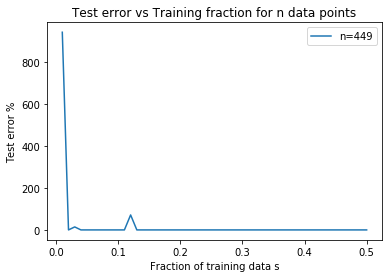

In [12]:
s1=numpy.linspace(0.01,0.5,50,endpoint=True) # training fraction
t_error=np.zeros(len(s1))#error
images_foldername = 'pngs'
characters_to_load = ['09','_1']

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
features,F = extract_6features(pngs)
n=shape(F)[0]
y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])

for i in range(len(s1)):
        s=s1[i]
        test_error = compute_errors(F,y_true,n,s) # computes test error
        t_error[i]=test_error

plot(s1,t_error) # plotting test error
xlabel('Fraction of training data s')
ylabel('Test error %')
title('Test error vs Training fraction for n data points')
legend(['n='+str(n)])

#### Another example of error rate vs training fraction plot for comparison of all handwritten images of period/dot and 2.

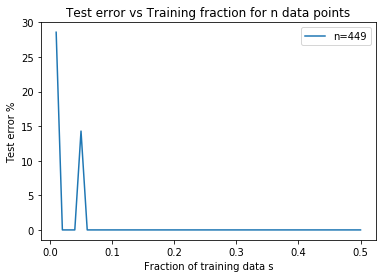

In [34]:
s1=numpy.linspace(0.01,0.5,50,endpoint=True)
t_error=np.zeros(len(s1))
images_foldername = 'pngs'
characters_to_load = ['09','_2']

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
features,F = extract_6features(pngs)
n=shape(F)[0]
y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])

for i in range(len(s1)):
        s=s1[i]
        test_error = compute_errors(F,y_true,n,s)
        t_error[i]=test_error

plot(s1,t_error)
xlabel('Fraction of training data s')
ylabel('Test error %')
title('Test error vs Training fraction for n data points')
legend(['n='+str(n)])

#### Hence looking at the two graphs of comparing period/dot with 1 and 2, we get an insight that as the error rate is high initially for low training fraction, but as we increase the training fraction the error tends to fade away.

## V. Computing the hyperplane W for all the pairs of characters in which it can be computed and Classification of images on the basis of data gathered. 

### The hyperplane W is computed using 3/4th data as training data and 1/4th as testing data. The Hyperplane is computed by the  "apply_SVM" fuction using the training data. This hyperplane W is the separating line in 6-D space. 
#### Also, note that for some of the characters the SVM fails and gives an error, which we handle here using the try-catch block and display "Error" message for those comparisons.

In [41]:
images_foldername = 'pngs'
characters =['09','_0','_1','_2','_4','_7','_8','_9','_m','_o','_r'] # all characters to load
characters_to_load=[]
ins=[]# list to compute sign(dot(W,X))
Error = [[None]*11 for x in range(11)] #empty error list
for i in range(len(characters)):
    for j in range(len(characters)):
        if i!=(len(characters)-1):
            try:
                characters_to_load=[characters[i],characters[j]]
                pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
                features,F = extract_6features(pngs)
                y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])
                s=0.75 #3/4th training data
                n=shape(F)[0] #n has all the values to be divided in training and test data
                
                tr_l=[]#training length
                te_l=[]#testing length
                tr_l=random.sample(range(n), int(s*n))#random values for train length
                te_l=setdiff1d(range(n),tr_l)#length-training values

                y_train = y_true[tr_l] #Y_train
                F_train=F[tr_l,:] #F_train
                F_test=F[te_l,:] #F_test
                y_test = y_true[te_l] #Y_test
                W_train,X_train = apply_SVM(F_train,y_train) #returns W_train and X_train
                W_test,X_test = apply_SVM(F_test,y_test) #returns W_test and X_test
                ins=sign(dot(W_test,X_test)) #contains +1 and -1 for test data
                #print(ins[:10])
                print(W_train)
            except (ValueError, IndexError) as e: # catching exception for cvxopt
                print("err") 
        else: break

err
[ 1.94400894 -2.79629556 -2.16730873 -2.14052082 -0.27057695  0.30767681
  0.2152702 ]
[ 3.64708166 -2.37818375 -2.46707092 -6.69684312 -2.11059322  2.27621282
 -3.90032683]
[ 3.10044757 -3.90663945 -4.04375126 -3.37313601 -0.96991655  0.04741512
  0.08819672]
[  2.00000000e+00  -4.08204022e-23   5.52956396e-23  -4.47255401e-23
  -1.14550720e-21  -1.09327866e-21   4.58507818e-24]
[ 2.84035841 -2.34980401 -2.96279336 -2.64101365 -1.3378228  -0.14292211
  0.47599774]
[ 2.05629287 -3.08494114 -2.01724807 -1.8168769  -0.37884953  0.15349054
  0.18087187]
[ 1.72270843 -3.20189842 -2.22546334 -2.63784557  1.40485683 -0.3259629
  0.45271899]
[ 1.58306124 -2.67472845 -2.90477682 -1.5957903   0.73200103  0.2652813
  0.44239819]
[ 3.31048245 -4.61438901 -3.08727406 -3.37761854 -0.62789264 -1.03948719
 -0.48705887]
[ -6.34540397e-11  -9.25587948e-10   3.89666226e-10   1.92220086e-11
   3.61843214e-10  -1.66635440e-10   1.12177130e-10]
[-2.08597457  2.77212887  2.31553484  2.16046382  0.175281

[ 1053.31349879  4913.78811682 -2159.46658264 -3985.75901334  -517.22083596
  -143.3728865  -1166.18224654]
[  1.21837512e-10   1.20799936e-10  -2.24248055e-10   1.90590521e-10
  -1.80374745e-10  -1.65192709e-10  -4.54056460e-10]
[-13.78258359  22.88750968  13.4539861  -15.19454024  16.2201919
  -7.59748564 -19.25697652]
err
[ -1.09033645e-05  -1.30112648e-05   2.48894384e-07   1.91639635e-05
   6.54824628e-06   1.23262450e-05  -5.64104825e-07]
err
[-2.60483445  5.06849685  3.536855    3.4310606  -0.09796019 -0.04207624
 -0.45127579]
err
[  1.88077514e-09   3.86969012e-09  -1.93931602e-09  -2.11524086e-09
  -3.04016514e-09   5.91386408e-11  -4.78138302e-11]
[ -5.67449231e-08  -5.53709337e-08   5.34567769e-08   2.66299955e-08
   6.30669847e-08   1.57896146e-08   2.01808741e-08]
[  2.00000000e+00  -3.74253641e-22   1.08931972e-22  -2.79351654e-22
  -1.75938006e-22  -8.06443028e-22   6.74600478e-23]
[ -1.09852114e-08   6.64476872e-07  -5.79608026e-07  -2.01058139e-07
   3.51962196e-07  -1

### A trial to classifying the images based on the "sign(dot(W,X))" value using the test set.  

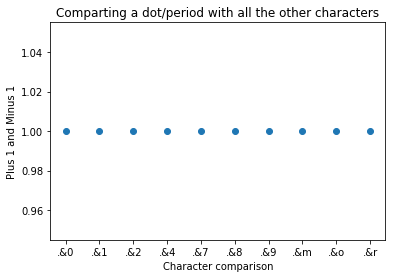

In [51]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])# first 10 outputs
my_xticks = ['.&0', '.&1', '.&2', '.&4','.&7','.&8','.&9','.&m','.&o','.&r'] #comparison
xlabel('Character comparison')
ylabel('Plus 1 and Minus 1')
title('Comparting a dot/period with all the other characters')
plt.xticks(x, my_xticks)
plt.plot(ins[:10],'o') #plotting first 10 sign(dot(W,X)) for test data
plt.show()

#### In the above graph we compare the period/dot with all the other elements. (2.)
We get a +1 for some values and a -1 for others, we know that the graph is just a display of "sign(dot(W,X))" using the testing data. Hence we can conclude to say that the +1 are probably the period/dot. The values which are the -1's are otherwisebut here all the values are a period/dot.

## VI. Conclusion:

Initial step is the extraction the images, the features of the images and their visualization using various functions. Next step was to build a table to show which characters can be accurately distinguished, which cannot and for which cvxopt has the bugs. Then we implement cross validation using the SVM to plot test error vs training fraction for two sets of images. The next step was to compute the hyperplane W for all pair of characters. The last step was to classify the images using the test data.

Hence by performing all these steps, we can conclude to say that, there exists a hyperplane for most pair of characters to distinguish the images. 

Although for some pairs the cvxopt fails and for some there is a large error. Which we also computed in the table.


## VII. CODE

Populating the interactive namespace from numpy and matplotlib
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 

[  3.15810126e-09  -1.32002681e-08   9.89640051e-09  -5.00742587e-09
  -7.88072156e-09   3.55145464e-09   1.21540011e-08]
[ -9.68699700e-10  -4.76501868e-09   4.17361120e-10   5.26365591e-09
   6.95401756e-10   7.72321744e-10  -9.08370374e-10]
[ -5.19421032e-08  -4.95973424e-07   4.70482734e-07   6.21410781e-08
  -1.09432033e-07   8.54554343e-08   3.26665837e-07]
[  6.00716607e-09  -4.55448365e-08   5.52768280e-08  -3.39419336e-08
   1.46070552e-08  -3.62759322e-10   2.34101291e-08]
[-1.82750499  2.96290238  1.87996235  1.91456309 -0.14992668 -0.07000768
 -0.24512778]
[  1.15041549e-10   1.04440436e-09  -8.72461983e-10  -4.51108905e-10
   1.67981755e-11  -2.00099891e-12  -2.23427772e-10]
[  5.00242398  24.59264373 -15.88883782 -12.84643145  -4.14603657
  -0.20210387  -1.73110365]
[  33.0446474   124.79790096 -100.86057232  -47.39125622  -57.23423814
   11.47122346    3.19825232]
[  2.00000000e+00  -1.88143823e-22  -7.85206749e-22  -5.69044679e-22
  -1.06553198e-21  -7.72990733e-23  -2.

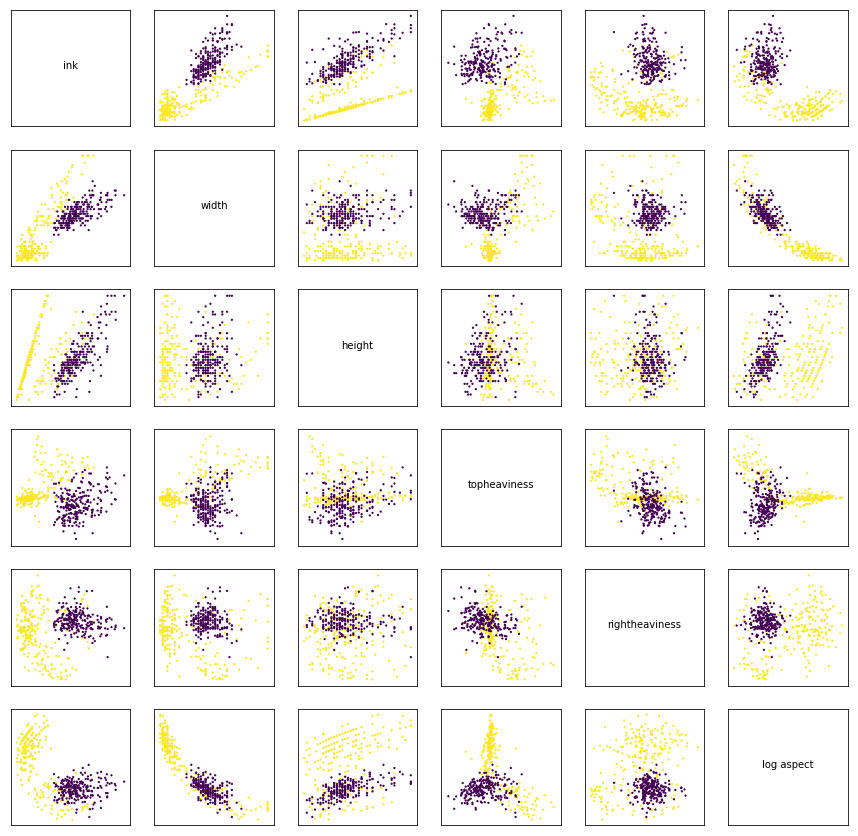

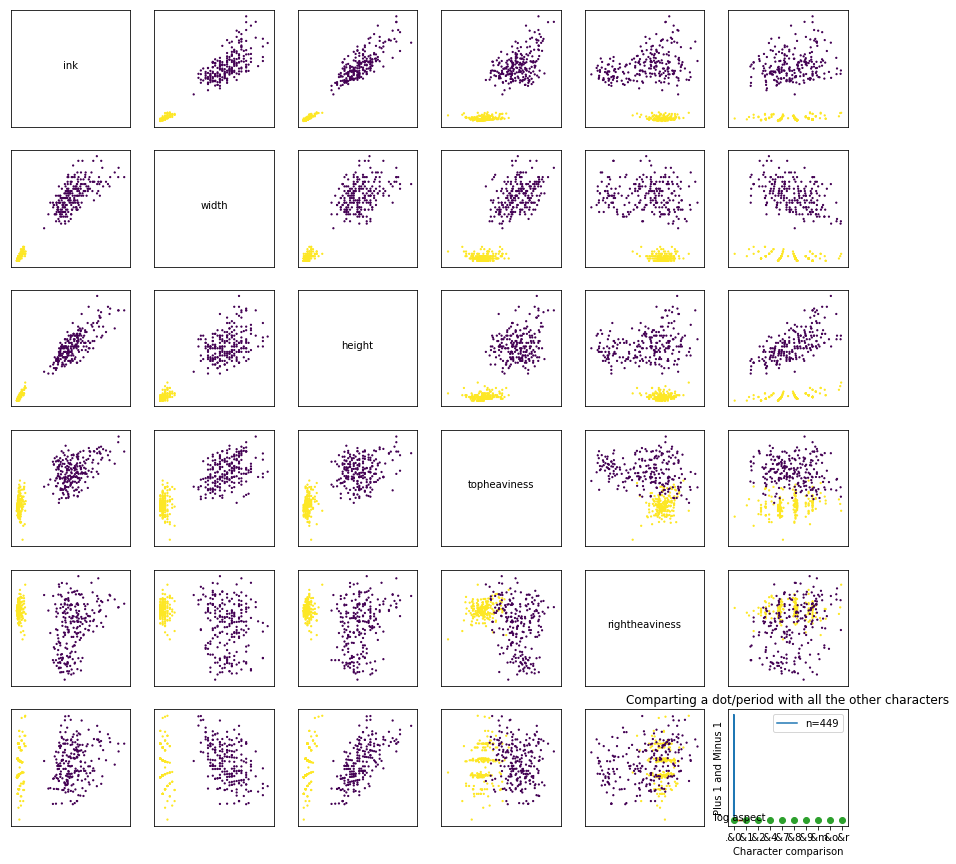

In [16]:
from PIL import Image #This module provides a number of factory functions, including functions to load images from files, and to create new images.
import glob #The glob module finds all the pathnames matching a specified pattern
from numpy import * #numpy package
%pylab inline

def load_images_extract_labels(images_foldername,characters_to_load): # fuction to load images and extract labels
    pngs = [] # contains all png filenames
    for c in characters_to_load:# to compute filenames of characters we want.
        pngs += glob.glob('pngs/*_'+c+'.png') #load filenames of characters we want
    
    labels = []# contains labels of all characters (09,_1,_2 and so on)
    for i,png in enumerate(pngs):
        labels.append(png[-6:-4])  #computing labels of characters we want
        
    return pngs,labels #returns pngs and labels

images_foldername = 'pngs' #folder name
characters_to_load = ['09','_8']# classification of '.' and 8's
pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #function call to get labels and filenames of '.' and '8'
#print(labels)
#print([label=='09' for label in labels])
y_true = array([1*(label=='09') for label in labels]) + array([-1*(label=='_8') for label in labels]) # contains +1 for '.' and -1 for '8'
print(y_true)

def extract_6features(png): # function to extract features

    n = len(pngs) # n has length of png array
    features = ['ink','width','height','topheaviness','rightheaviness','log aspect'] # the features we are extracting
    d = len(features) # d has length of feature array
    F = empty((n,d))  # array of feature vectors


    for i,png in enumerate(pngs): # loop though all png
        img = Image.open(png)#open the png image
        a = array(img)# a contains array of images
        #print( a.shape )
        a = a[:,:,0]   #  select the red layer (because red, green, blue all the same)
        h,w = a.shape # h and w stores the shape of a
        x = linspace(0,w,w,endpoint=False) # iterates from 0 to w
        y = linspace(0,h,h,endpoint=False) # iterates from 0 to h
        X,Y = meshgrid(x,y) # creates a meshgrid data
        a = array(255-a,dtype=float)
        ink = a.sum()
        F[i,0] = ink/(255*w*h/5)   # can we normalize this sensibly?
        xmin = X[ a>0 ].min()  # the minimum x value where a>0
        xmax = X[ a>0 ].max()# the max x value where a>0
        ymin = Y[ a>0 ].min()  # the minimum y value where a>0
        ymax = Y[ a>0 ].max()# the max y value where a>0
        width  = xmax - xmin #total width of image
        height = ymax - ymin #total height of image
        F[i,1] = width/w   # can we normalize this sensibly?
        F[i,2] = height/h   # can we normalize this sensibly?
        xc = (xmin+xmax)/2   # center of character on x axis
        yc = (ymin+ymax)/2 # center of character on y axis
        # could alteranatively use center of mass
        # xc = (a*X).sum()/ink
        # yc = (a*Y).sum()/ink
        F[i,3] = a[ Y>yc ].sum()/ink # total ink above center

        F[i,4] = a[ X>xc ].sum()/ink  # total ink to the right of center
        
        F[i,5] = log10(height/width) # log of aspect ratio

    return features,F # returns feature array and 6-D F array.

features,F = extract_6features(pngs) #feature array and 6-D F array.
shape(F) # print shape of array F

def visualize_2D_projections(F,features,pngs,label_vector):
    colors = 'cmbgrkyw' # different colors
    distinct_labels = list(set(label_vector)) #contains a list of different labels
    label_dict = {distinct_labels[i]:i for i in range(2)}
    print(label_dict)
    d = shape(F)[1] # number_features
    figure(figsize=(15,15)) # size of the figure
    for i in range(d):
        for j in range(d):
            subplot(d,d,i*d+j+1) # plot the i,j coordinate plane projections
            if i==j: 
                text(.5,.5,features[i],ha='center')
            else:
                scatter(F[:,j],F[:,i], s=2, c=label_vector, marker=(5, 0)) # scatter plot
            xticks([])
            yticks([])            
    return

images_foldername = 'pngs' # folder name
characters_to_load = ['_1','_8'] # classification of '1' and 8's

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)#function call to get labels and filenames of '1' and '8'
features,F = extract_6features(pngs) # extract feature and F for '1' and '8'
y_true = array([1*(label=='_1') for label in labels]) + array([-1*(label=='_8') for label in labels]) #y_true for '1' and '8'.

visualize_2D_projections(F,features,pngs,y_true) #visualizing these

from cvxopt import matrix,solvers #cvopt package to compute solver
def apply_SVM(F,y): #SVM function
    
    n,d=shape(F) #n and d has the shape of F for different images
    X = empty((d+1,n)) # empty list with 7 dimenions
    X[0,:] = 1 # initializing 1 
    X[1:,:] = F.T # for all others F.T
    
    #Preparing the parameters for cvxopt solver
    P = eye(d+1) 
    P[0,0] = 0
    q = zeros(d+1)
    G = (-X*y).T
    h = -ones(n)
    P = matrix(P)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    
    #Solve the problem
    solvers.options['show_progress'] = False
    sol=solvers.qp(P,q,G,h)
    
    # The separating hyperplane 'W'
    W = array(sol['x']).reshape(d+1)

    return W,X # returns hyperplane and array X

images_foldername = 'pngs' # folder name
characters_to_load = ['09','_2'] # classification of '.' and '2's

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #function call to get labels and filenames of '.' and '2'
features,F = extract_6features(pngs) # extract F and features for '.' and '2'

y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])
print(y_true) ##y_true +1 for 1'st char and -1 for 2nd char in "characters_to_load " .

visualize_2D_projections(F,features,pngs,y_true) #visualizing these

W,X = apply_SVM(F,y_true)
y = sign(dot(W,X))
Error = 1- sum(y==y_true)/shape(F)[0]
print(Error) #error for '.' and '2' 

import pandas # pandas to build table
images_foldername = 'pngs'
characters = ['09','_0','_1','_2','_4','_7','_8','_9','_m','_o','_r'] # all the characters
characters_to_load=[]
Error = [[None]*11 for x in range(11)] # error list  with inital value none of size 11
for i in range(len(characters)): #iterate through all characters in i
    for j in range(len(characters)): #iterate through all characters in j
        if i!=(len(characters)-1):# if at last character
            try: # bloack to catch exception
                characters_to_load=[characters[i],characters[j]] # load 2 characters at a time
                pngs,labels = load_images_extract_labels(images_foldername,characters_to_load) #return labels and filenames of these two characters
                features,F = extract_6features(pngs)# features and F of these 2 characters

                y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels]) #y_true for these two char
                W,X = apply_SVM(F,y_true) # apply SVM 
                y = sign(dot(W,X))# get y
                Error[i][j] = 1- sum(y==y_true)/shape(F)[0] #compute error
            except ValueError:#if exception
                Error[i][j] ='err' #print 'err'
        else: break


pandas.DataFrame(Error, characters ,characters)# build table

from cvxopt import matrix,solvers
import random
def compute_errors(F,y_true,n,s):#computes error for cross validation
    tr_l=[]#training length
    te_l=[]#testing length
    tr_l=random.sample(range(n), int(s*n))#random values for train length
    te_l=setdiff1d(range(n),tr_l)#length-training values

    y_train = y_true[tr_l] #Y_train
    F_train=F[tr_l,:] #F_train
    F_test=F[te_l,:] #F_test
    y_test = y_true[te_l] #Y_test
    W_train,X_train = apply_SVM(F_train,y_train) #returns W_train and X_train
    W_test,X_test = apply_SVM(F_test,y_test) #returns W_test and X_test

    Wtr_transpose=W_train.transpose() # transpose martrix W_train
    misclassified_test_data = sign(dot(Wtr_transpose,X_test)) !=  y_test 
    test_error = sum(misclassified_test_data)*100/ len(X_test) #compute test_error
    return test_error

s1=numpy.linspace(0.01,0.9,50,endpoint=True) # training fraction
t_error=np.zeros(len(s1))#error
images_foldername = 'pngs'
characters_to_load = ['09','_1']

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
features,F = extract_6features(pngs)
n=shape(F)[0]
y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])

for i in range(len(s1)):
        s=s1[i]
        test_error = compute_errors(F,y_true,n,s) # computes test error
        t_error[i]=test_error

plot(s1,t_error) # plotting test error
xlabel('Fraction of training data s')
ylabel('Test error %')
title('Test error vs Training fraction for n data points')
legend(['n='+str(n)])

s1=numpy.linspace(0.01,0.9,50,endpoint=True)
t_error=np.zeros(len(s1))
images_foldername = 'pngs'
characters_to_load = ['09','_2']

pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
features,F = extract_6features(pngs)
n=shape(F)[0]
y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])

for i in range(len(s1)):
        s=s1[i]
        test_error = compute_errors(F,y_true,n,s)
        t_error[i]=test_error

plot(s1,t_error)
xlabel('Fraction of training data s')
ylabel('Test error %')
title('Test error vs Training fraction for n data points')
legend(['n='+str(n)])

images_foldername = 'pngs'
characters =['09','_0','_1','_2','_4','_7','_8','_9','_m','_o','_r'] # all characters to load
characters_to_load=[]
ins=[]# list to compute sign(dot(W,X))
Error = [[None]*11 for x in range(11)] #empty error list
for i in range(len(characters)):
    for j in range(len(characters)):
        if i!=(len(characters)-1):
            try:
                characters_to_load=[characters[i],characters[j]]
                pngs,labels = load_images_extract_labels(images_foldername,characters_to_load)
                features,F = extract_6features(pngs)
                y_true = array([1*(label==characters_to_load[0]) for label in labels]) + array([-1*(label==characters_to_load[1]) for label in labels])
                s=0.75 #3/4th training data
                n=shape(F)[0] #n has all the values to be divided in training and test data
                
                tr_l=[]#training length
                te_l=[]#testing length
                tr_l=random.sample(range(n), int(s*n))#random values for train length
                te_l=setdiff1d(range(n),tr_l)#length-training values

                y_train = y_true[tr_l] #Y_train
                F_train=F[tr_l,:] #F_train
                F_test=F[te_l,:] #F_test
                y_test = y_true[te_l] #Y_test
                W_train,X_train = apply_SVM(F_train,y_train) #returns W_train and X_train
                W_test,X_test = apply_SVM(F_test,y_test) #returns W_test and X_test
                ins=sign(dot(W_test,X_test)) #contains +1 and -1 for test data
                #print(ins[:10])
                print(W_train)
            except (ValueError, IndexError) as e: # catching exception for cvxopt
                print("err") 
        else: break
            
x = np.array([0,1,2,3,4,5,6,7,8,9,10])# first 10 outputs
my_xticks = ['.&0', '.&1', '.&2', '.&4','.&7','.&8','.&9','.&m','.&o','.&r'] #comparison
xlabel('Character comparison')
ylabel('Plus 1 and Minus 1')
title('Comparting a dot/period with all the other characters')
plt.xticks(x, my_xticks)
plt.plot(ins[:10],'o') #plotting first 10 sign(dot(W,X)) for test data
plt.show()

## References

#### 1. http://www.acsu.buffalo.edu/~danet/Sp18/MTH448/

#### 2. https://matplotlib.org/users/pyplot_tutorial.html

#### 3. https://stackoverflow.com/questions/8069057/try-except-inside-a-loop


In [ ]:
ss